# Week 1 Studio - EDA | Water Potability
Link to the dataset: https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability

## Understanding your data

In [40]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Read the CSV file
df = pd.read_csv('water_potability.csv')

# Display the first 5 rows of the dataframe
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [42]:
# Check rows and cols of df (df.shape)
print("Number of rows and cols of data:", df.shape)

Number of rows and cols of data: (3276, 10)


In [43]:
# Display the columns names and data types of the dataframe
print(df.dtypes)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


###

## Data Cleaning
- 1 Check Duplicates
- 2 Drop Duplicates
- 3 Check Outliers
- 4 Working with Outliers: Correcting, Removing
- 5 Check Outliers after correction
- 6 Check Missing Values

In [44]:
# 1. Check duplicates
df.duplicated().sum()

np.int64(0)

In [45]:
# View the duplicate records
duplicates = df.duplicated()

df[duplicates]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [46]:
# 2. Drop Duplicates
data_cleaned = df.drop_duplicates()

In [47]:
# View the shape of the data
#data_cleaned.shape  

In [48]:
# 3. Check Outliers
# Create a boxplot for all the continuous features
data_cleaned.boxplot(column = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
                     'Organic_carbon', 'Organic_carbon', 'Turbidity', 'Potability'], rot = 45, figsize = (20,10))

<Axes: >

In [49]:
# 4. Working with outliers: Correcting, Removing
#df_outliers = pd.DataFrame(df.loc[:,])

# Calculate IQR
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

ph                     1.968974
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               52.250673
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       21.492937
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [50]:
# The first array contains the list of row numbers
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [51]:
# The second array respective column numbers
# We can use IQR score to filter out the outliers by keeping only valid values

outliers_condition = ~((data_cleaned < (Q1 - 1.5 * IQR)) | (data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)
data_no_outliers = data_cleaned[outliers_condition]

In [52]:
missing_values = data_cleaned.isnull().sum()

In [53]:
print("==============================================================================================")
print("MISSING VALUES")
print(missing_values)

data_no_outliers.to_csv("water_potability_no_outliers.csv", index=False)
data = data_no_outliers
print("==============================================================================================")
print("DATA WITH NO OUTLIERS")
print(data)

MISSING VALUES
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
DATA WITH NO OUTLIERS
            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3270  6.069616  186.659040  26138.780191     7.747547  345.700257   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11

# EDA

SUMMARY STATISTICS
                  count          mean          std         min           25%  \
ph               2500.0      7.073836     1.443743    3.148712      6.115523   
Hardness         2951.0    196.509523    29.295255  117.791230    177.837686   
Solids           2951.0  21597.987516  8080.717798  320.942611  15521.392543   
Chloramines      2951.0      7.118711     1.437921    3.181183      6.175305   
Sulfate          2247.0    334.105192    37.901251  229.575561    309.080461   
Conductivity     2951.0    425.545964    80.117872  201.619737    365.210558   
Organic_carbon   2951.0     14.317080     3.206064    5.362371     12.127810   
Trihalomethanes  2804.0     66.419854    15.573778   23.792950     55.939855   
Turbidity        2951.0      3.969211     0.760715    1.872573      3.440526   
Potability       2951.0      0.381904     0.485936    0.000000      0.000000   

                          50%           75%           max  
ph                   7.035894      8.001

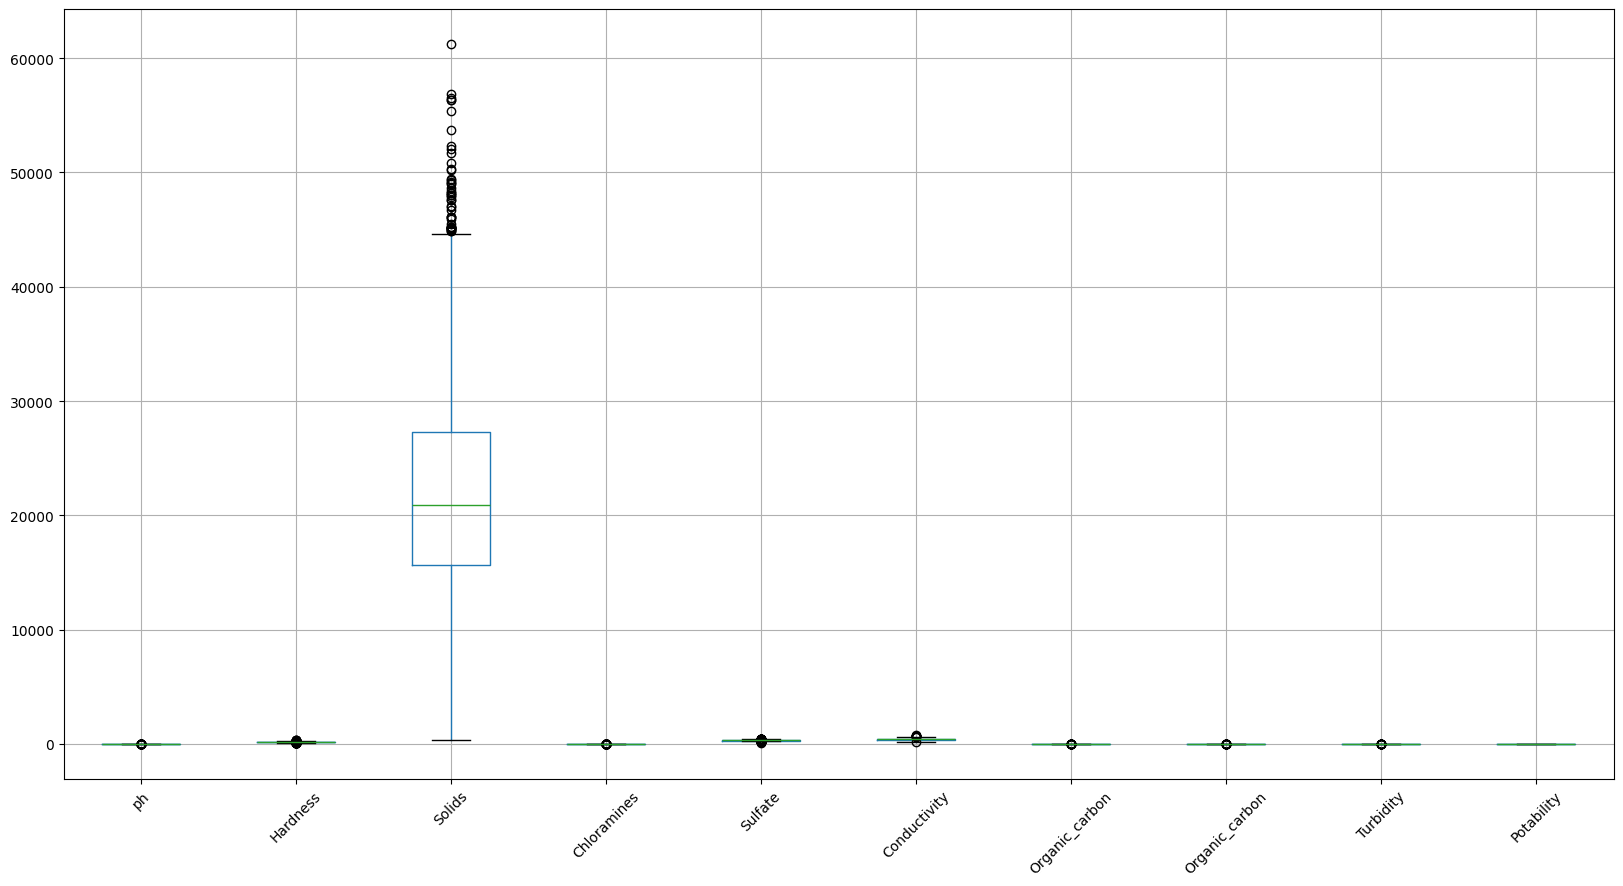

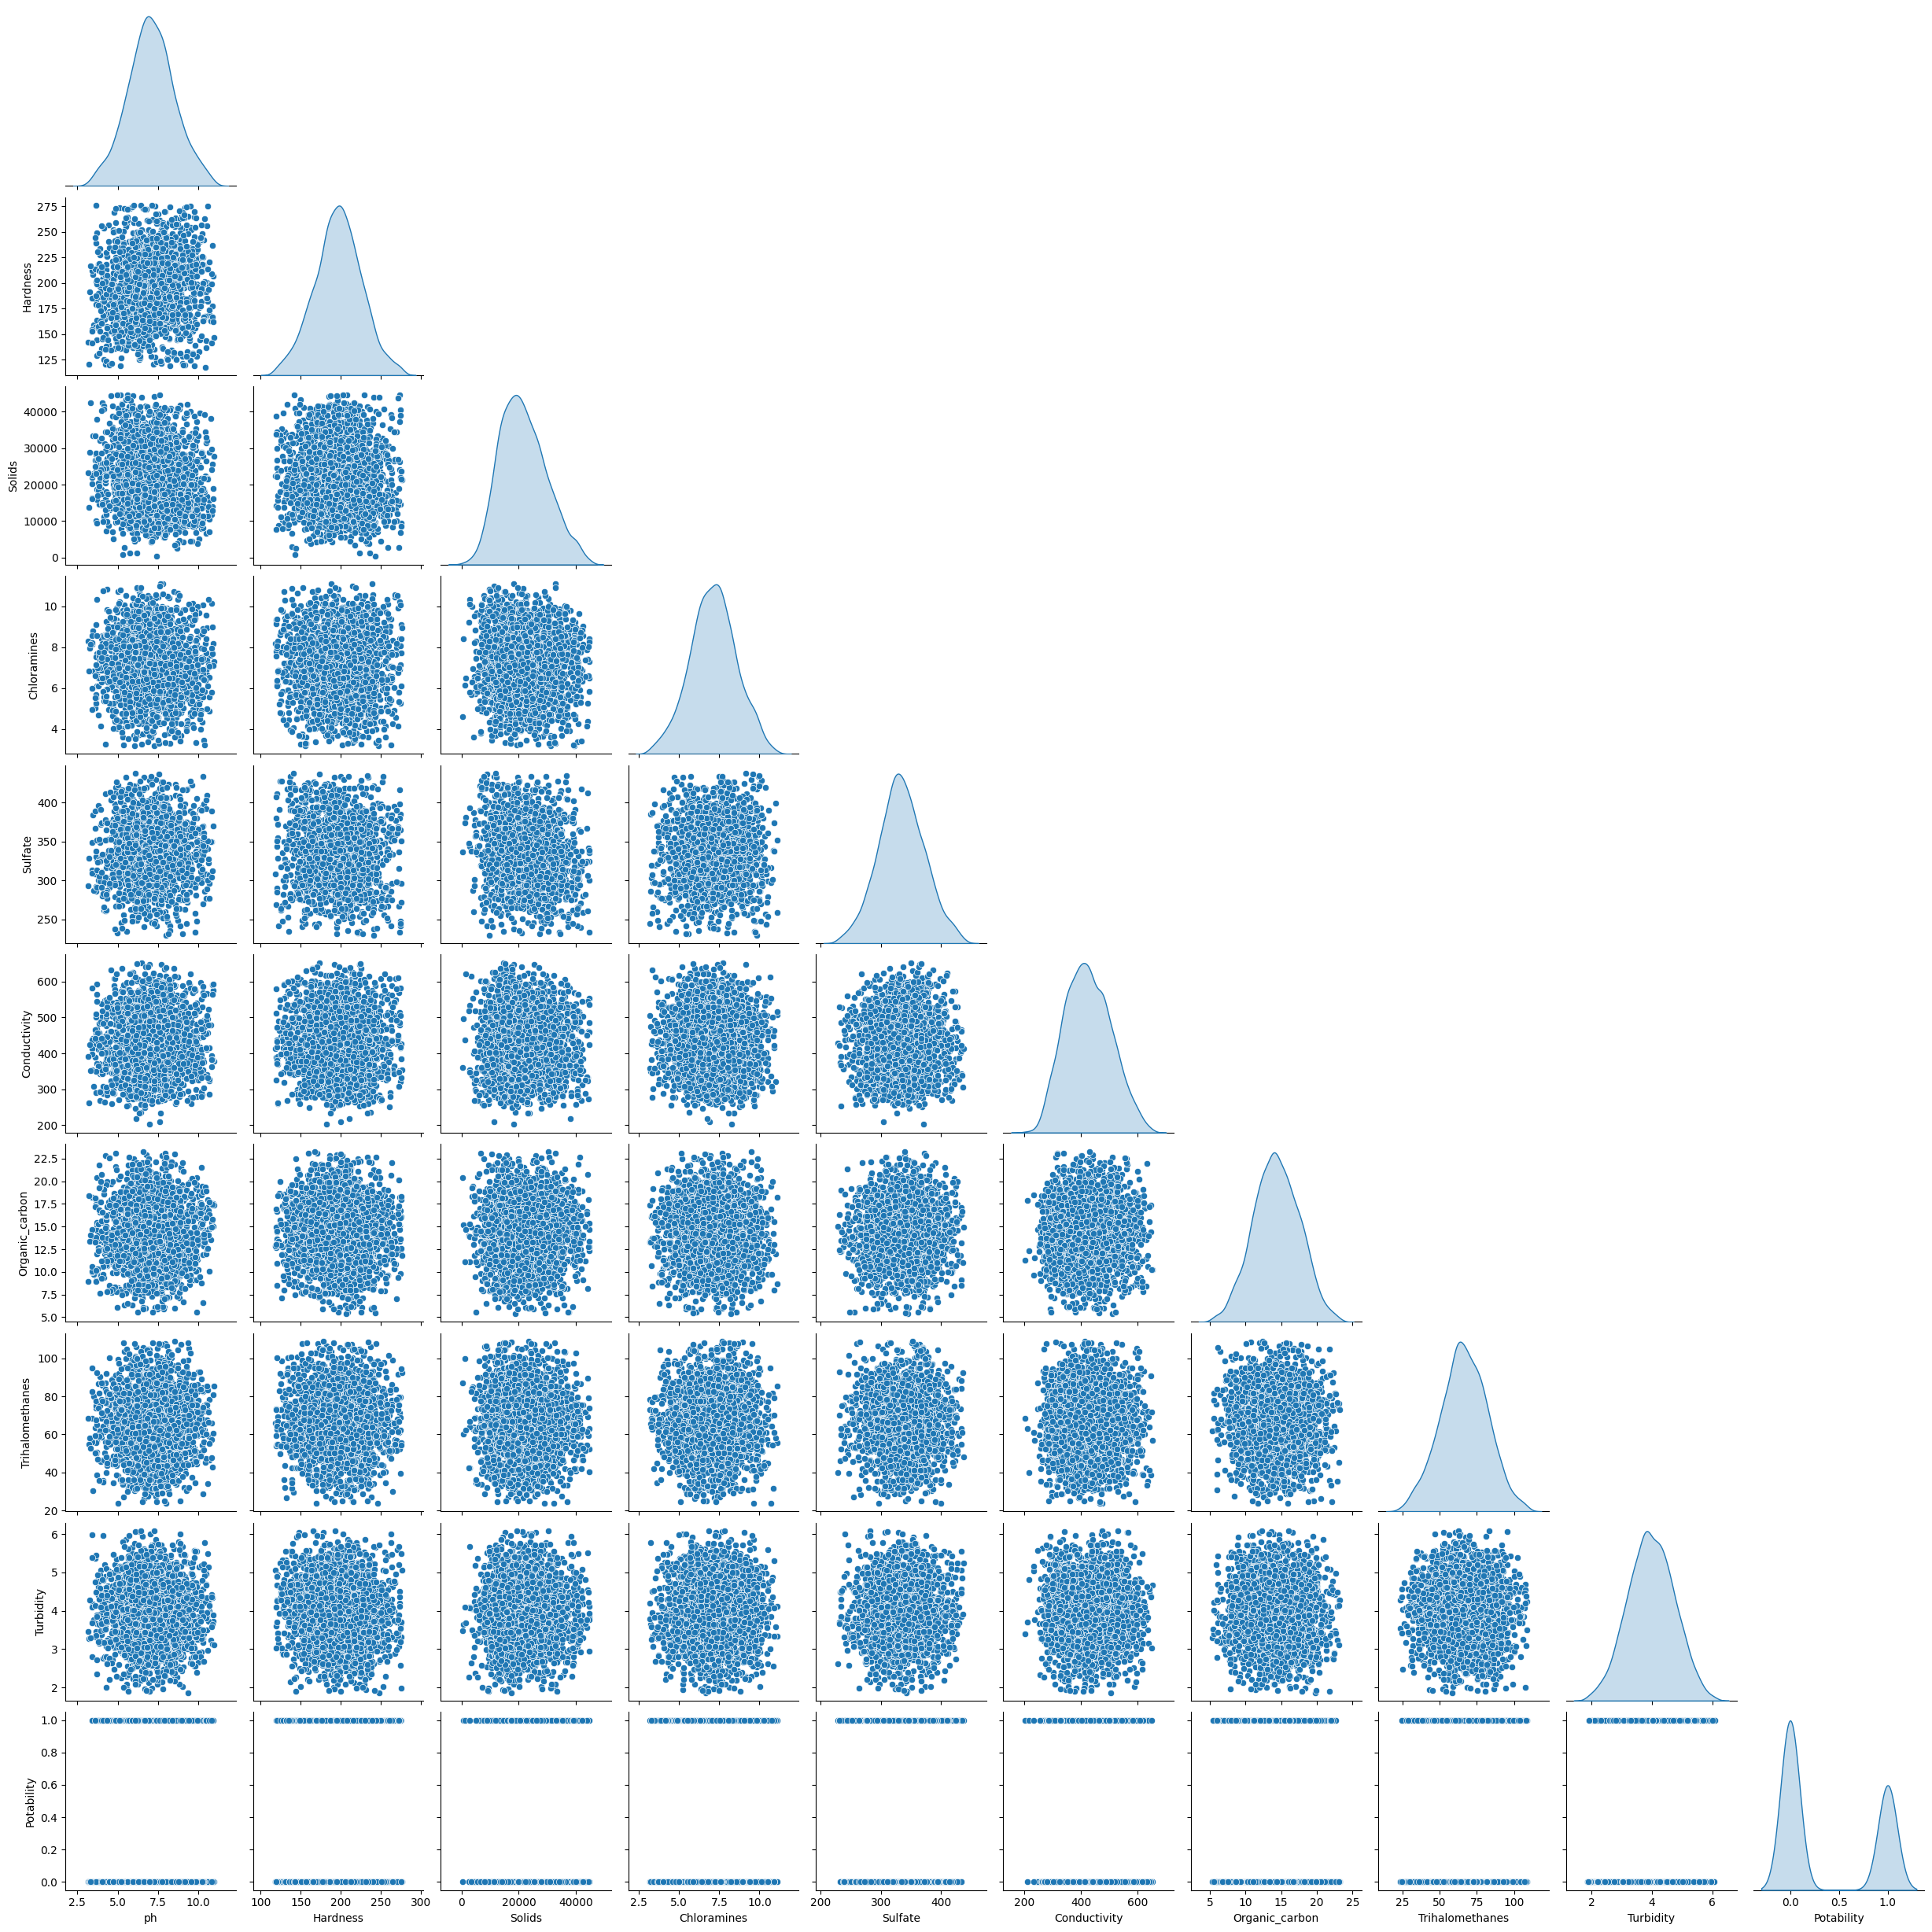

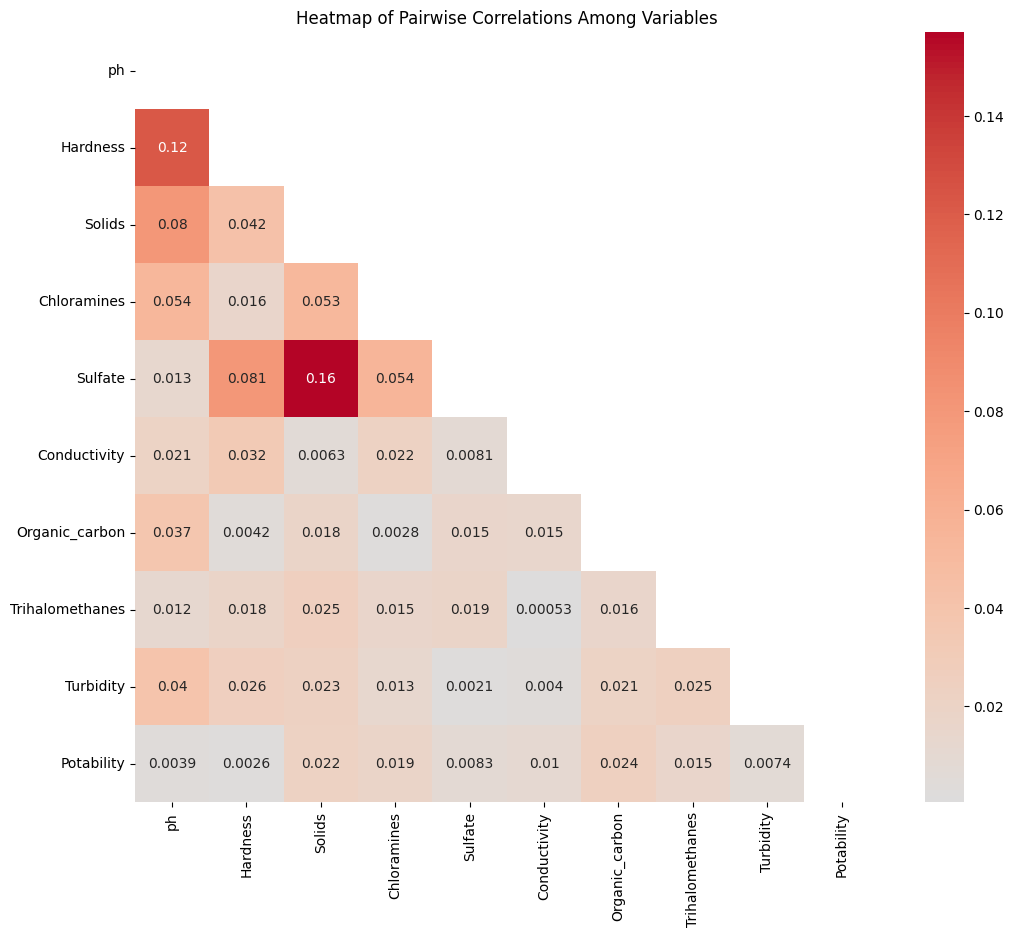

In [54]:
# EXPLORATORY DATA ANALYSIS

#   Univariate Analysis - Visualize the distribution of each feature 

#       Define a function to plot the distribution with mean line
def plot_distribution(data, column_name):
    plt.figure(figsize=(13, 6))
    sns.histplot(data[column_name], color="b", kde=True)
    plt.axvline(data[column_name].mean(), linestyle="dashed", color="k", label="mean", linewidth=2)
    plt.legend(loc="best", prop={"size": 14})
    plt.title(f"{column_name} Distribution")
    plt.show()

#       List of columns to plot (excluding 'Potability')
columns = [col for col in data_no_outliers.columns if col != 'Potability']

#       Plot each column
# for col in columns:
#     plot_distribution(data_no_outliers, col)


#   Summary statistics
print("==============================================================================================")
print("SUMMARY STATISTICS")
print(data.describe().T)

#   Multivariate Analysis - Visualize the grid of pairwise plots
sns.pairplot(data_no_outliers, diag_kind='kde', corner=True)
# plt.show()

#   Multivariate Analysis - Correlations values
print("==============================================================================================")
print("CORRELATION VALUES")
print(data.corr())

#   Correlations Heatmap
#       Calculate the absolute correlation matrix
corr = abs(data.corr())

#       Mask the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

#       Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', center=0)
plt.title('Heatmap of Pairwise Correlations Among Variables')

plt.show()